In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import warnings
import sklearn
from sklearn.linear_model import LinearRegression
!pip3 install html5lib
!pip3 install lxml
#Who should the 2020-2021 NBA MVP be

In [2]:
#Data Scraping
link = "https://www.basketball-reference.com/leagues/NBA_2021_totals.html"
re = requests.get(link)
nba_soup = BeautifulSoup(re.content, 'html.parser')
nba_soup.prettify()
t = nba_soup.find('table')
df = pd.read_html(str(t))
table = pd.concat(df)
table.head()



,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF,21,MIA,61,4,737,124,228,...,.509,73,135,208,29,20,28,43,91,304
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,...,NaN,0,3,3,2,0,0,0,1,2
2,3,Steven Adams,C,27,NOP,58,58,1605,189,308,...,.444,213,301,514,111,54,38,78,113,438
3,4,Bam Adebayo,C,23,MIA,64,64,2143,456,800,...,.799,142,431,573,346,75,66,169,145,1197
4,5,LaMarcus Aldridge,C,35,TOT,26,23,674,140,296,...,.872,19,99,118,49,11,29,27,47,352


In [3]:
#Data Tidying
table = table[~table["Rk"].str.contains("Rk")]
table["GS"] = pd.to_numeric(table["GS"])
table = table[table["GS"] > 48]
table = table[["Player","Pos","G","GS","MP","FG%","3P%","FT%","TRB","AST","STL","BLK","PTS"]]
table



,Player,Pos,G,GS,MP,FG%,3P%,FT%,TRB,AST,STL,BLK,PTS
2,Steven Adams,C,58,58,1605,.614,.000,.444,514,111,54,38,438
3,Bam Adebayo,C,64,64,2143,.570,.250,.799,573,346,75,66,1197
16,Kyle Anderson,PF,69,69,1887,.468,.360,.783,396,250,84,57,854
17,Giannis Antetokounmpo,PF,61,61,2013,.569,.303,.685,671,357,72,73,1717
30,Deandre Ayton,C,69,69,2115,.626,.200,.769,727,99,41,81,997
...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,Coby White,PG,69,54,2156,.416,.359,.901,284,328,38,15,1041
706,Andrew Wiggins,PF,71,71,2364,.477,.380,.714,347,167,67,70,1320
712,Patrick Williams,PF,71,71,1983,.483,.391,.728,327,99,64,46,655
714,Zion Williamson,PF,61,61,2026,.611,.294,.698,441,226,57,39,1647


In [4]:
minutes = []
rb = []
ast = []
stl = []
blk = []
pts = []

for tu in table.itertuples():
    minutes.append(float(tu[5])/float(tu[3]))
    rb.append(float(tu[9])/float(tu[3]))
    ast.append(float(tu[10])/float(tu[3]))
    stl.append(float(tu[11])/float(tu[3]))
    blk.append(float(tu[12])/float(tu[3]))
    pts.append(float(tu[13])/float(tu[3]))
    
table["MP"] = minutes
table["TRB"] = rb
table["AST"] = ast
table["STL"] = stl
table["BLK"] = blk
table["PTS"] = pts

table = table.rename(columns = {"TRB": "RPG", "AST": "ASTG","STL": "STLG", "BLK": "BLKG", "PTS": "PPG","MP": "MPG"})
table

,Player,Pos,G,GS,MPG,FG%,3P%,FT%,RPG,ASTG,STLG,BLKG,PPG
2,Steven Adams,C,58,58,27.672414,.614,.000,.444,8.862069,1.913793,0.931034,0.655172,7.551724
3,Bam Adebayo,C,64,64,33.484375,.570,.250,.799,8.953125,5.406250,1.171875,1.031250,18.703125
16,Kyle Anderson,PF,69,69,27.347826,.468,.360,.783,5.739130,3.623188,1.217391,0.826087,12.376812
17,Giannis Antetokounmpo,PF,61,61,33.000000,.569,.303,.685,11.000000,5.852459,1.180328,1.196721,28.147541
30,Deandre Ayton,C,69,69,30.652174,.626,.200,.769,10.536232,1.434783,0.594203,1.173913,14.449275
...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,Coby White,PG,69,54,31.246377,.416,.359,.901,4.115942,4.753623,0.550725,0.217391,15.086957
706,Andrew Wiggins,PF,71,71,33.295775,.477,.380,.714,4.887324,2.352113,0.943662,0.985915,18.591549
712,Patrick Williams,PF,71,71,27.929577,.483,.391,.728,4.605634,1.394366,0.901408,0.647887,9.225352
714,Zion Williamson,PF,61,61,33.213115,.611,.294,.698,7.229508,3.704918,0.934426,0.639344,27.000000


TypeError: can't multiply sequence by non-int of type 'numpy.float64'

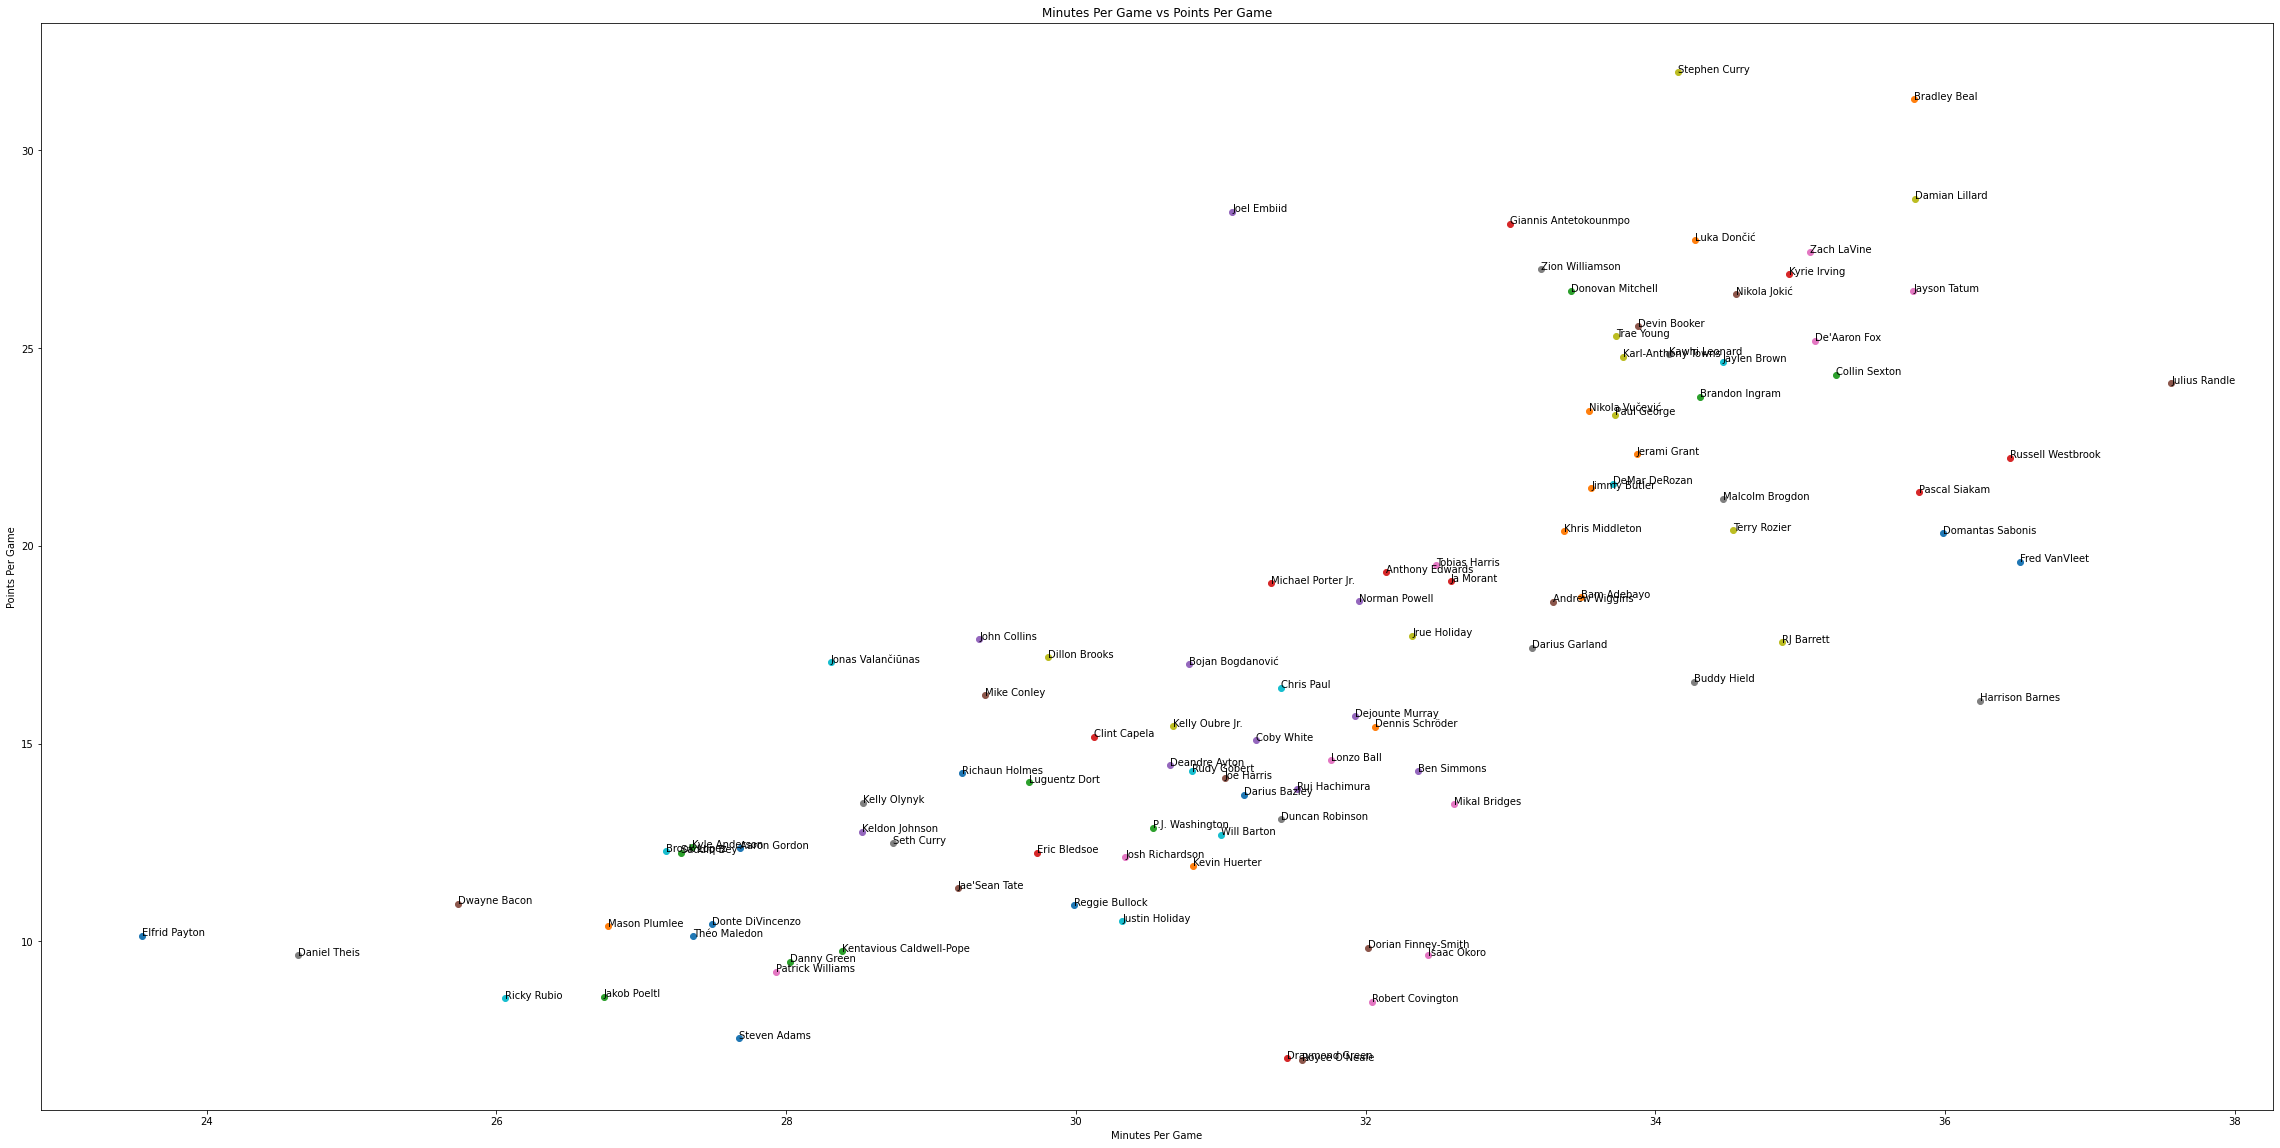

In [13]:
#Data Analysis
plt.subplots(figsize = (40,20))
for x in table.itertuples():
    plt.scatter(marker="o",x= x[5], y= x[13])
    plt.annotate(x[1], (x[5], x[13]))
        
plt.xlabel("Minutes Per Game")
plt.ylabel("Points Per Game")
plt.title("Minutes Per Game vs Points Per Game")
m, b = np.polyfit(table["MPG"], table["PPG"], 1)
plt.plot(x, m*x + b)
plt.show()

            

In [ ]:
plt.subplots(figsize = (40,20))
for x in table.itertuples():
    plt.scatter(marker="o",x= x[5], y= x[9])
    plt.annotate(x[1], (x[5], x[9]))
        
plt.xlabel("Minutes Per Game")
plt.ylabel("Rebounds Per Game")
plt.title("Minutes Per Game vs Rebounds Per Game")
plt.show()

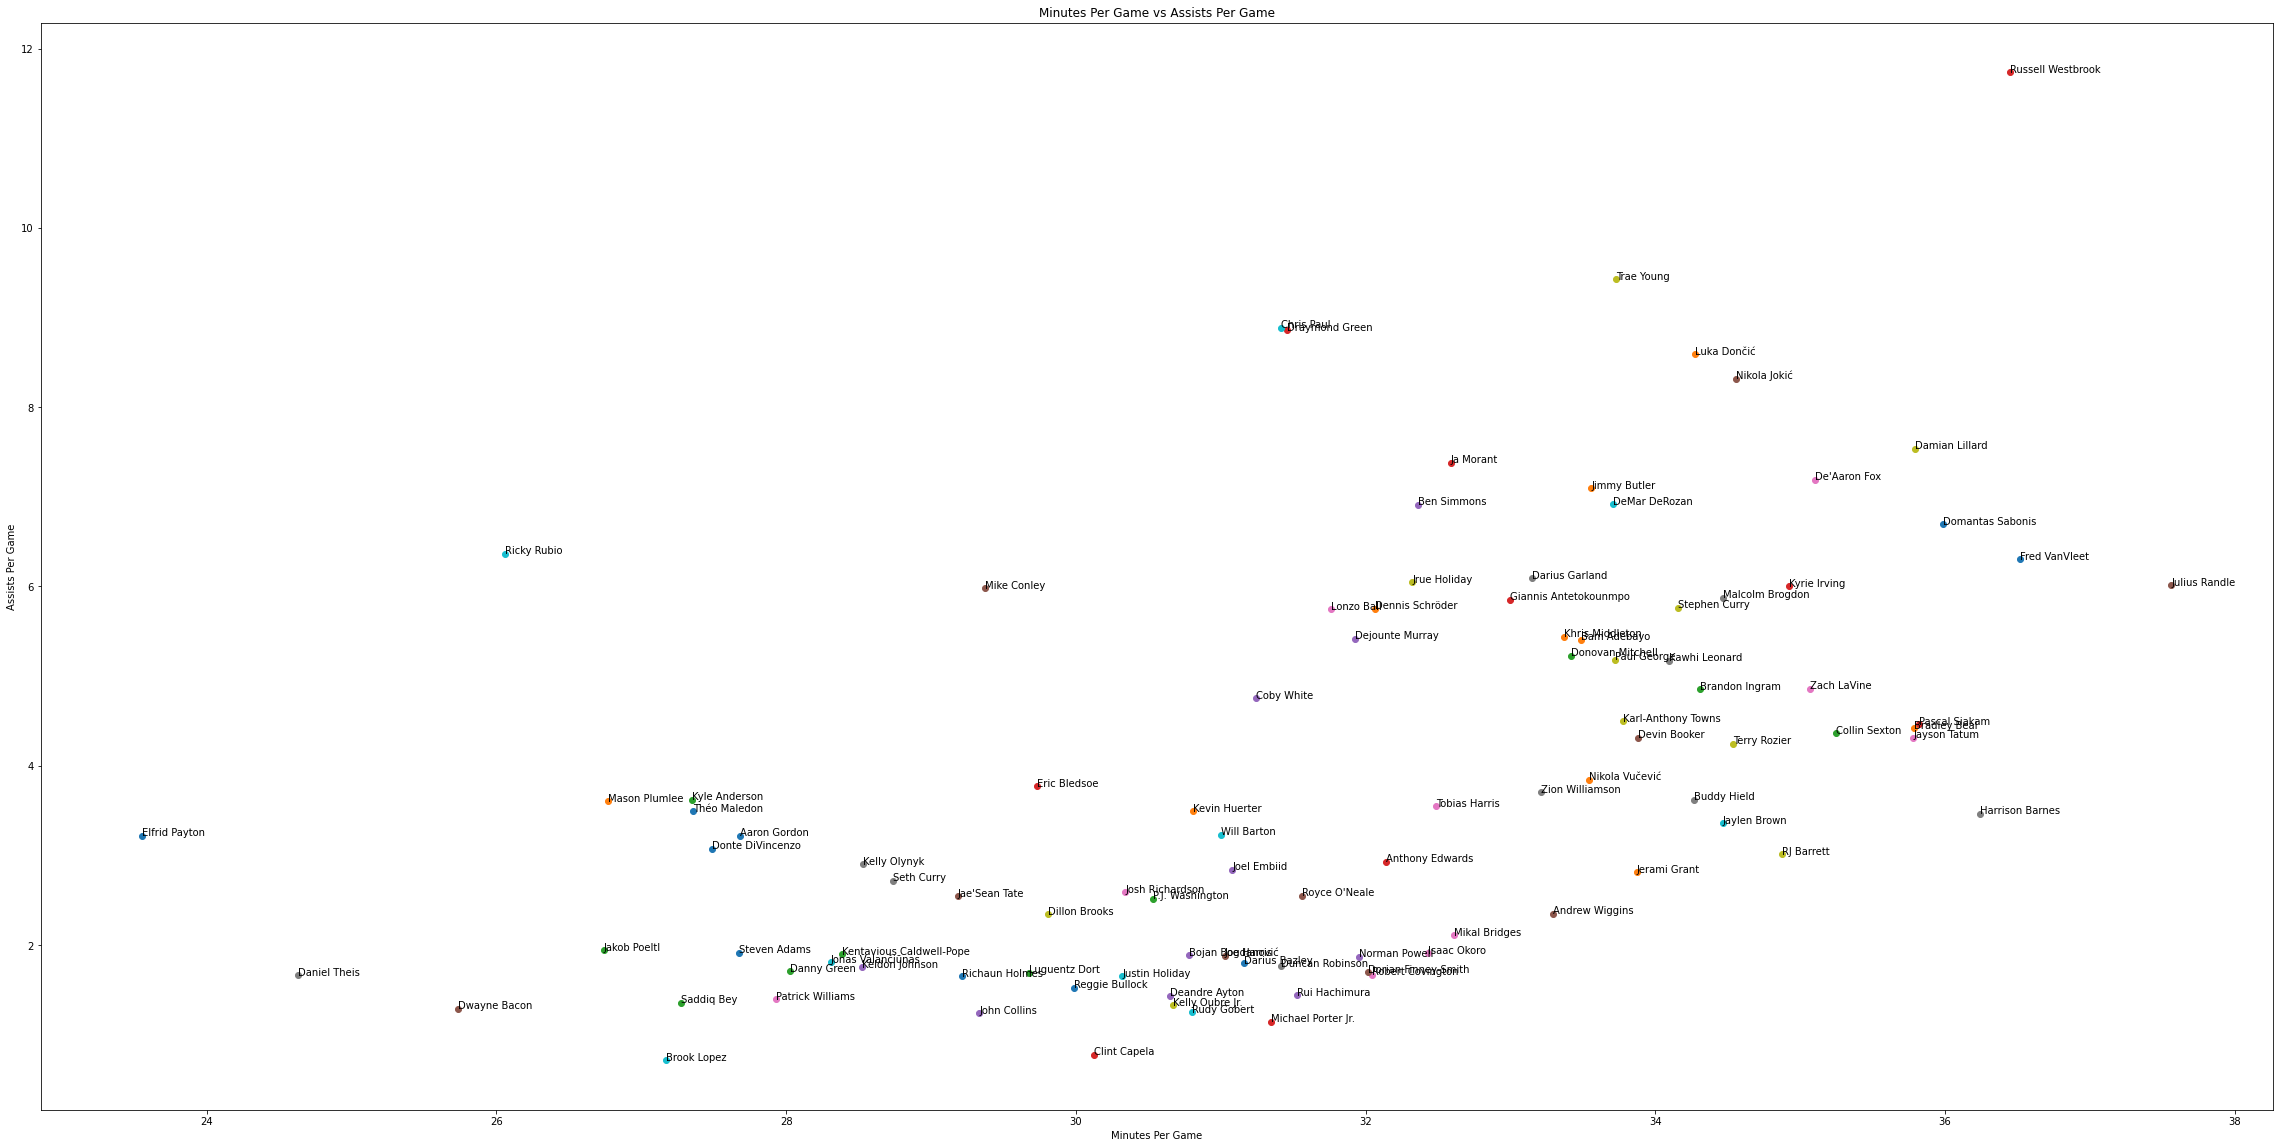

In [7]:
plt.subplots(figsize = (40,20))
for x in table.itertuples():
    plt.scatter(marker="o",x= x[5], y= x[10])
    plt.annotate(x[1], (x[5], x[10]))
        
plt.xlabel("Minutes Per Game")
plt.ylabel("Assists Per Game")
plt.title("Minutes Per Game vs Assists Per Game")
plt.show()

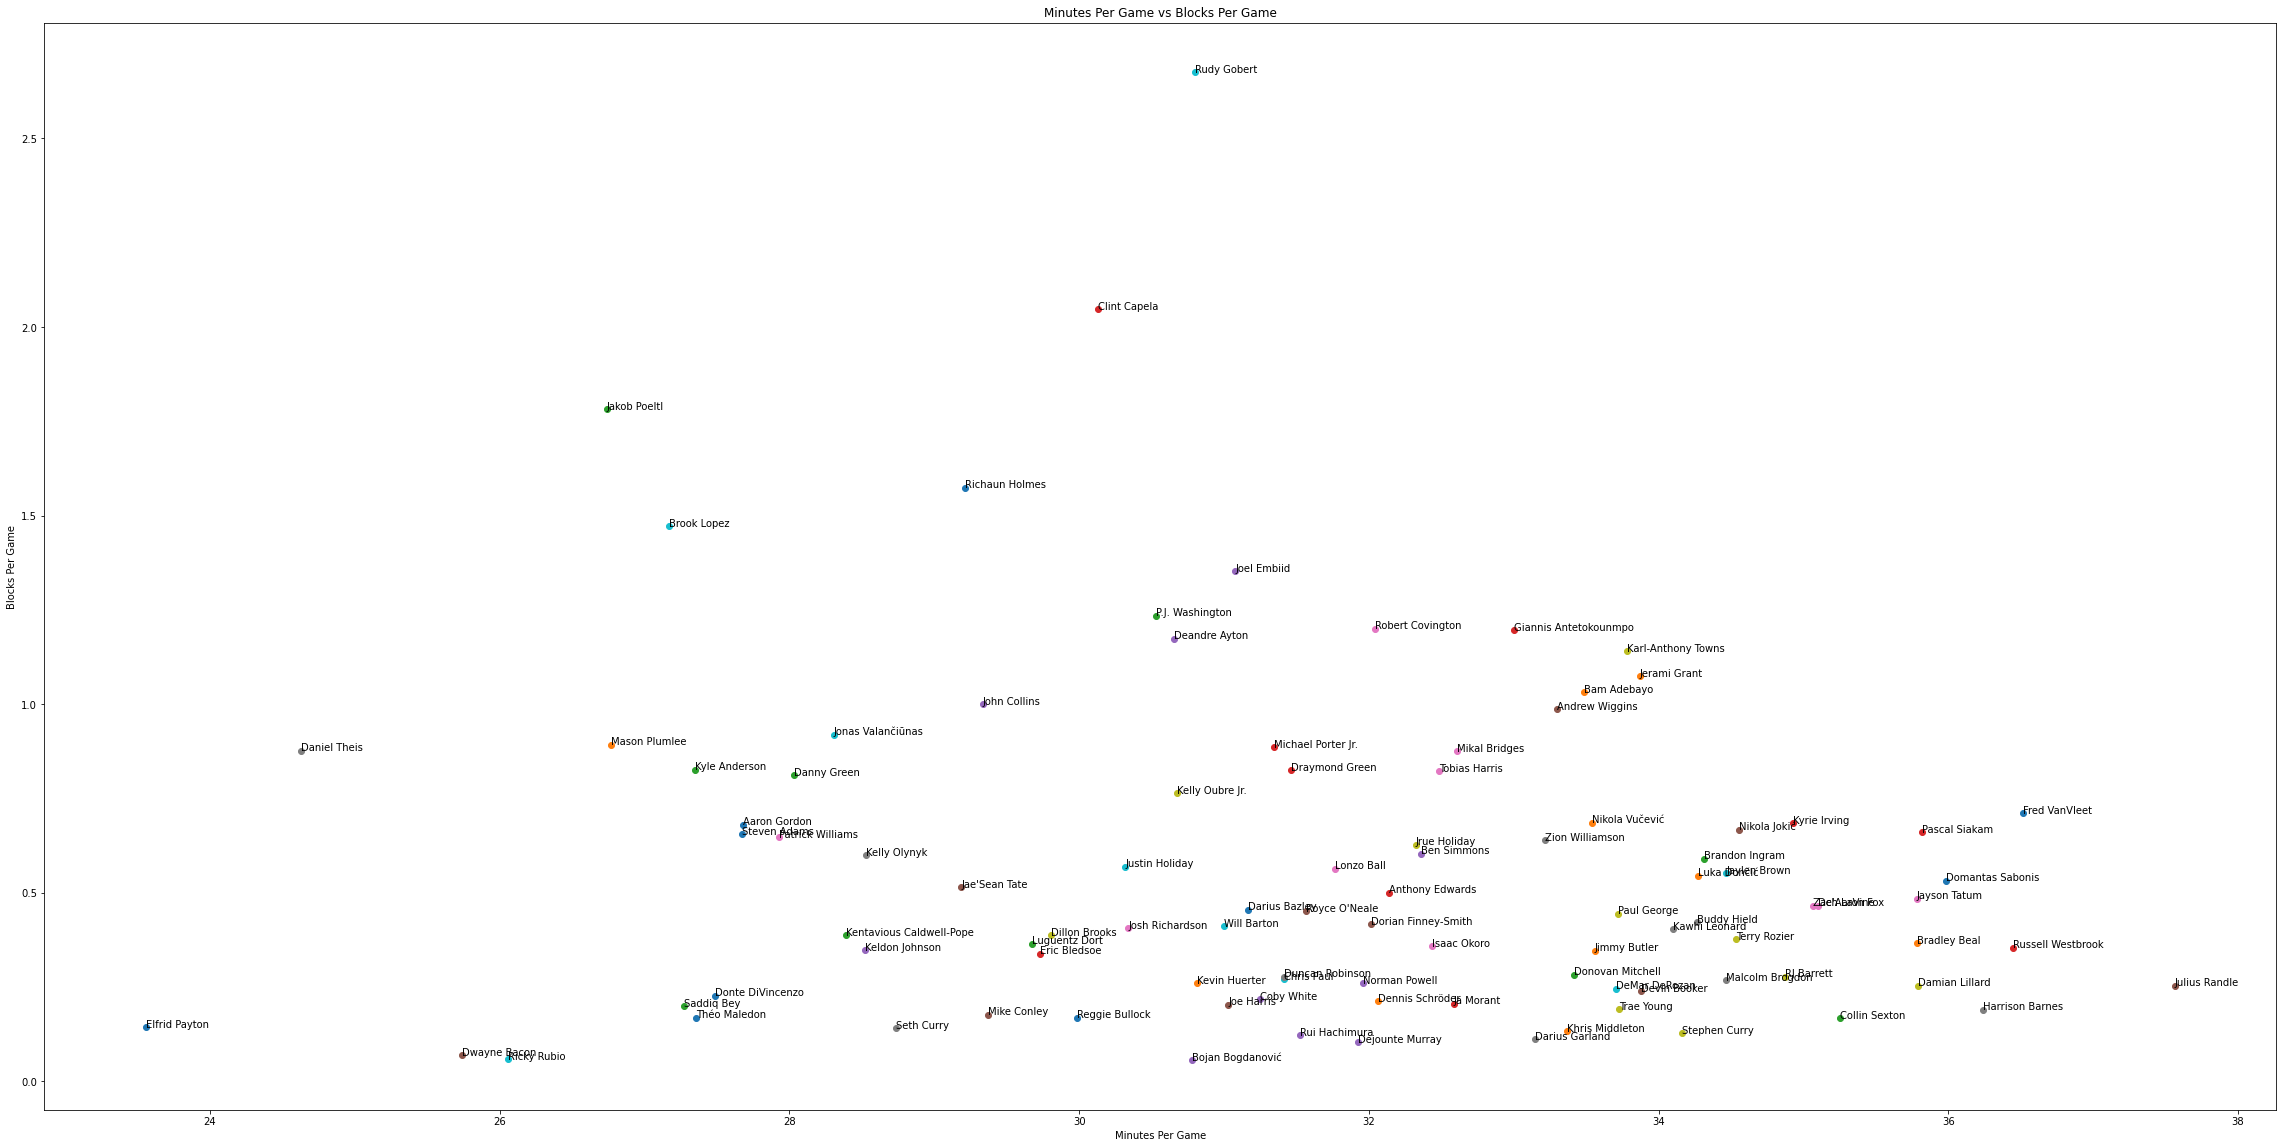

In [8]:
plt.subplots(figsize = (40,20))
for x in table.itertuples():
    plt.scatter(marker="o",x= x[5], y= x[12])
    plt.annotate(x[1], (x[5], x[12]))
        
plt.xlabel("Minutes Per Game")
plt.ylabel("Blocks Per Game")
plt.title("Minutes Per Game vs Blocks Per Game")
plt.show()

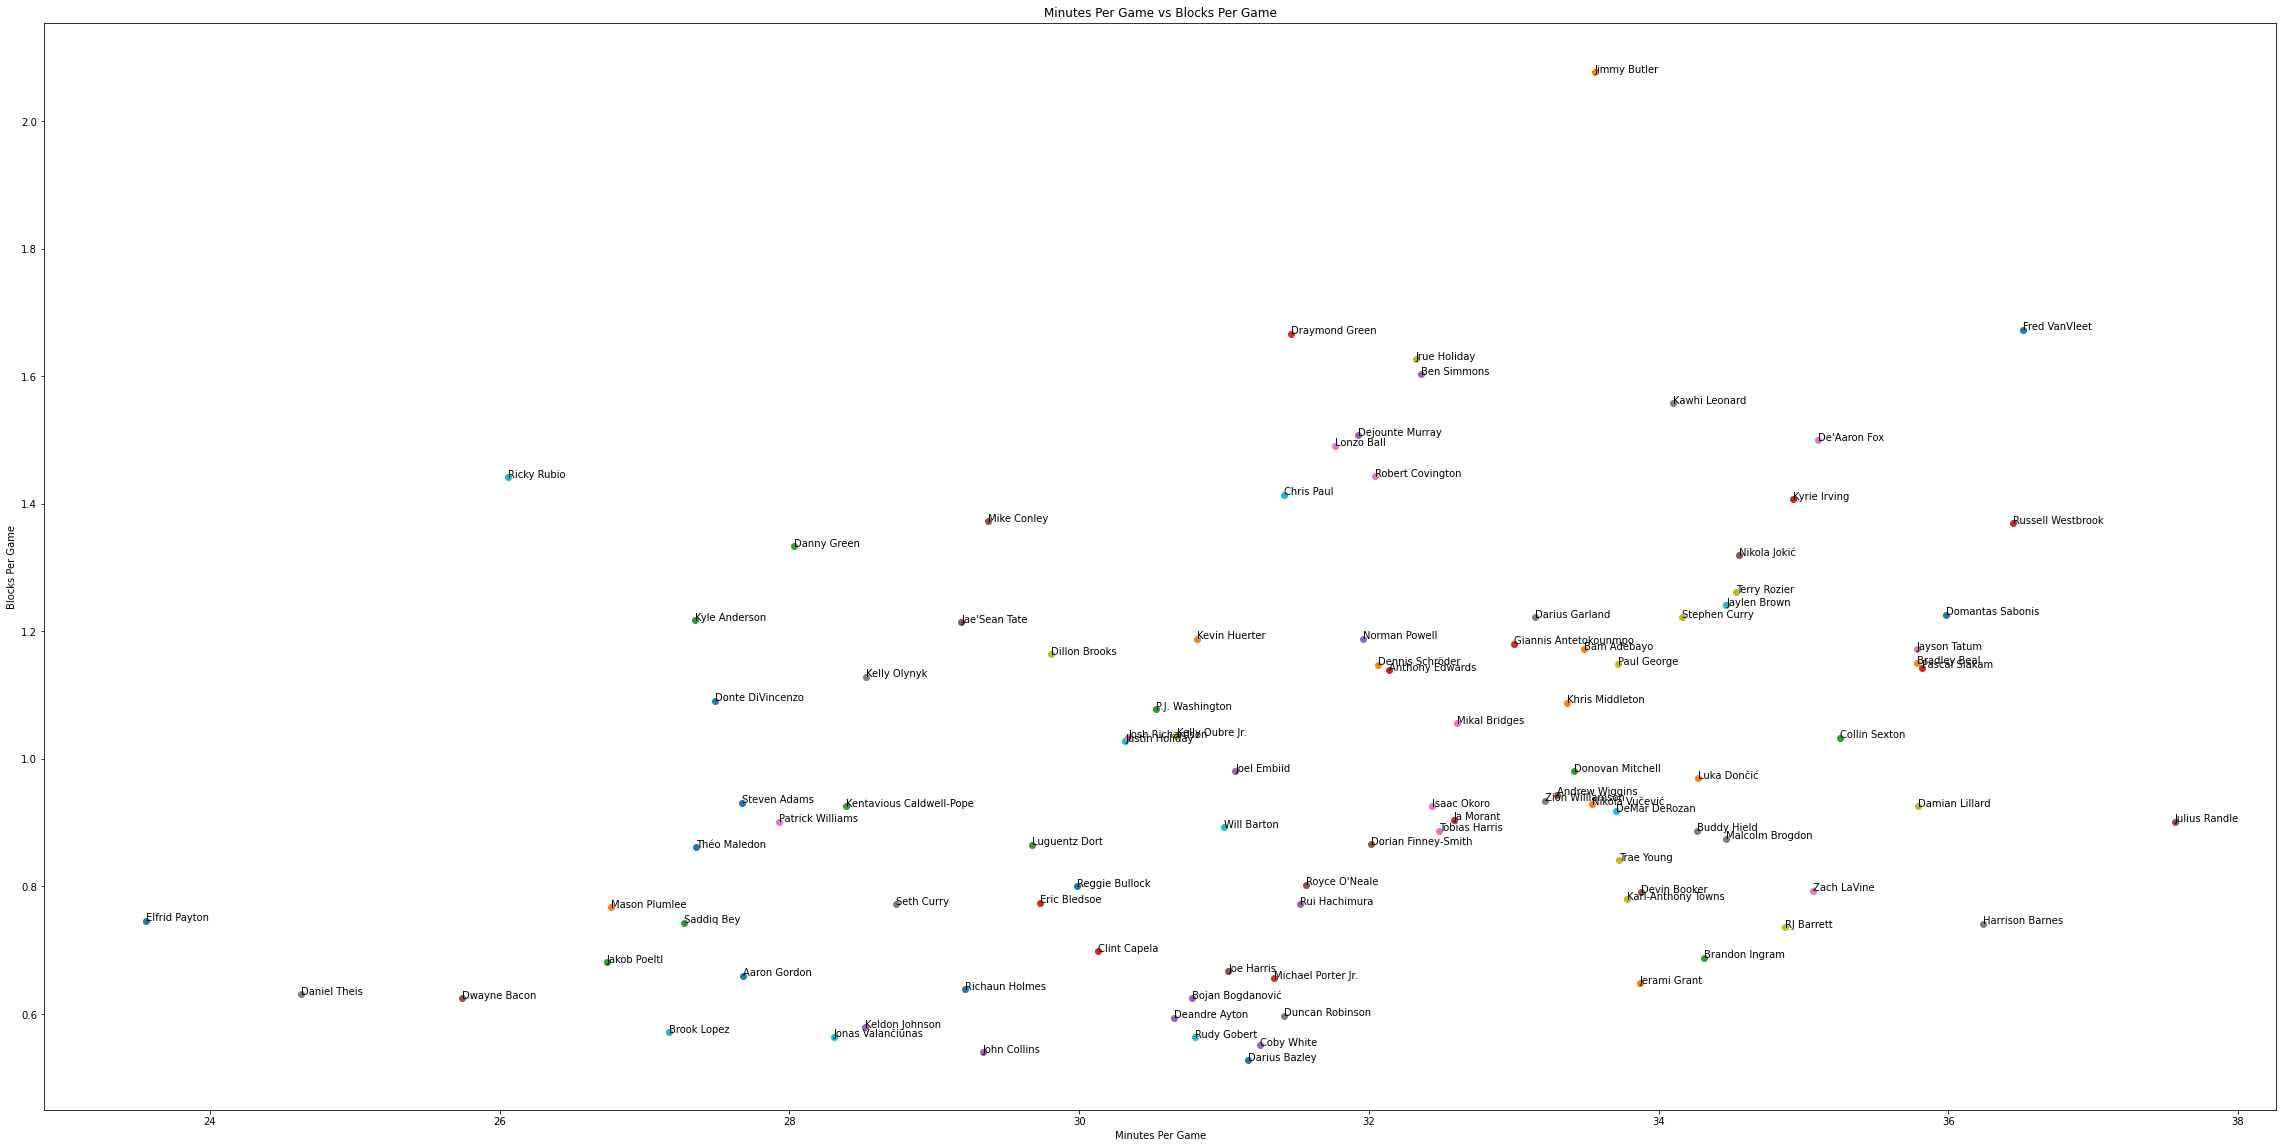

In [9]:
plt.subplots(figsize = (40,20))
for x in table.itertuples():
    plt.scatter(marker="o",x= x[5], y= x[11])
    plt.annotate(x[1], (x[5], x[11]))
        
plt.xlabel("Minutes Per Game")
plt.ylabel("Blocks Per Game")
plt.title("Minutes Per Game vs Blocks Per Game")
plt.show()